<a href="https://colab.research.google.com/github/KubaWinsztal/MachineLearning/blob/main/PD11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Theory Exploration**

#### What is a **transposed convolution**?

A **transposed convolution**, also known as a **deconvolution** or **fractionally-strided convolution**, is a neural network layer operation that performs upsampling on a feature map, increasing its spatial dimensions (height and width). While a standard convolution maps a neighborhood of input values to a single output value (a many-to-one mapping), a transposed convolution achieves the conceptual opposite: it maps a single input value to a neighborhood of output values (a one-to-many mapping).

Its primary purpose is to learn how to reverse the spatial transformation of a regular convolution. This makes it an essential building block in architectures that need to reconstruct high-resolution data from a compressed, low-resolution representation. Key applications include:
*   **Autoencoders:** The decoder part uses transposed convolutions to upsample the compressed latent vector back to the original image dimensions.
*   **Semantic Segmentation (e.g., U-Net):** The "expansive path" or decoder uses transposed convolutions to upsample feature maps, which are then combined with high-resolution features from the encoder to generate a full-resolution segmentation map.
*   **Generative Adversarial Networks (GANs):** The generator network often uses a series of transposed convolutions to transform a random noise vector into a full-sized, realistic image.

The name "transposed" is derived from linear algebra; the operation's forward pass can be expressed by a matrix multiplication using the transpose of the matrix that would represent the corresponding regular convolution.

#### How does it differ from a regular convolution?

The fundamental difference lies in their function and the way their parameters, especially stride and padding, affect the output dimensions.

| Feature | Regular Convolution | Transposed Convolution |
| :--- | :--- | :--- |
| **Primary Goal** | **Downsampling** / Feature Extraction | **Upsampling** / Spatial Expansion |
| **Mapping** | **Many-to-one:** A neighborhood of inputs maps to a single output pixel. | **One-to-many:** A single input pixel influences a neighborhood of output pixels. |
| **Stride's Role** | Determines how far the kernel **slides** over the input. A stride > 1 *reduces* the output size. | Acts as an **upsampling factor** by inserting `stride - 1` zeros between input pixels. A stride > 1 *increases* the output size. |
| **Padding's Role**| Adds zeros to the input border, typically to preserve dimensions or prevent information loss at the edges. Usually increases output size. | Applied to the *expanded* grid. It has the counter-intuitive effect of **cropping** the final output, as it reduces the area the kernel can travel over. A padding > 0 *decreases* the final output size. |

In summary, a regular convolution analyzes and shrinks, while a transposed convolution synthesizes and expands.

#### How does it upsample feature maps?

A transposed convolution upsamples a feature map through a three-step learnable process. It doesn't just use a fixed interpolation rule (like bilinear or nearest-neighbor); it learns the optimal upsampling weights for the task at hand.

The process is as follows:

1.  **Expansion (via Striding):** First, the input feature map is expanded by inserting `stride - 1` rows and columns of zeros between the original input pixels. If `stride = 2`, one row/column of zeros is added between each row/column of the input, creating a larger, "holey" grid. If `stride = 1`, no expansion occurs.
2.  **Padding:** Second, standard padding is applied to the border of this newly expanded grid. This step is crucial for controlling the final output dimensions.
3.  **Convolution:** Finally, a regular convolution operation (with a stride of 1) is performed on this expanded and padded grid using the layer's learnable kernel. The kernel slides over the grid, performing element-wise multiplications and summations. Because of the zeros inserted in the expansion step, each original input pixel's value is multiplied by the entire kernel, and the results are "painted" onto the output grid. Where the kernel's applications overlap, the results are additively combined.

This process ensures that each point in the input contributes to a larger region in the output, effectively learning how to "fill in the details" during upsampling.

#### What are **stride**, **padding**, and **kernel size**, and how do they influence the result in a transposed convolution?

These parameters are the geometric controls for the upsampling operation. Let's denote the input size as `i`, output size as `o`, kernel size as `k`, stride as `s`, and padding as `p`.

*   **Kernel Size (`k`):**
    *   **What it is:** The dimensions (e.g., 3x3) of the filter that is convolved with the expanded input.
    *   **Influence:** It defines the size of the output region that a single input pixel can influence. A larger kernel means a single input pixel's value is spread across a larger area in the output, leading to more overlap and blending between the contributions of adjacent input pixels.

*   **Stride (`s`):**
    *   **What it is:** The primary upsampling factor. It dictates the spacing of the original pixels in the expanded grid.
    *   **Influence:** This is the main control for how much larger the output will be. A `stride` of 2 will roughly double the output dimensions, `stride = 3` will roughly triple them, etc. It directly controls the "Expansion" step described above.

*   **Padding (`p`):**
    *   **What it is:** The number of zero-pixels added to the border of the *expanded* grid before the final convolution.
    *   **Influence:** In a transposed convolution, padding works inversely to how it does in a regular convolution: it **reduces** the output size. It's used to fine-tune the output dimensions, often to match a target shape (e.g., from a skip-connection in a U-Net). By adding padding, you restrict the locations where the kernel's top-left corner can be placed, effectively cropping pixels from the border of what would have been a larger output.

The precise relationship between these parameters is given by the formula:

`output_size = (input_size - 1) * stride - 2 * padding + kernel_size`

This formula is fundamental for designing decoder architectures, as it allows for precise calculation of feature map dimensions throughout the network.

**PART 2 - MANUAL DIAGRAM**

example for:
- stride = 2
- padding = 1
- kernel size = 3

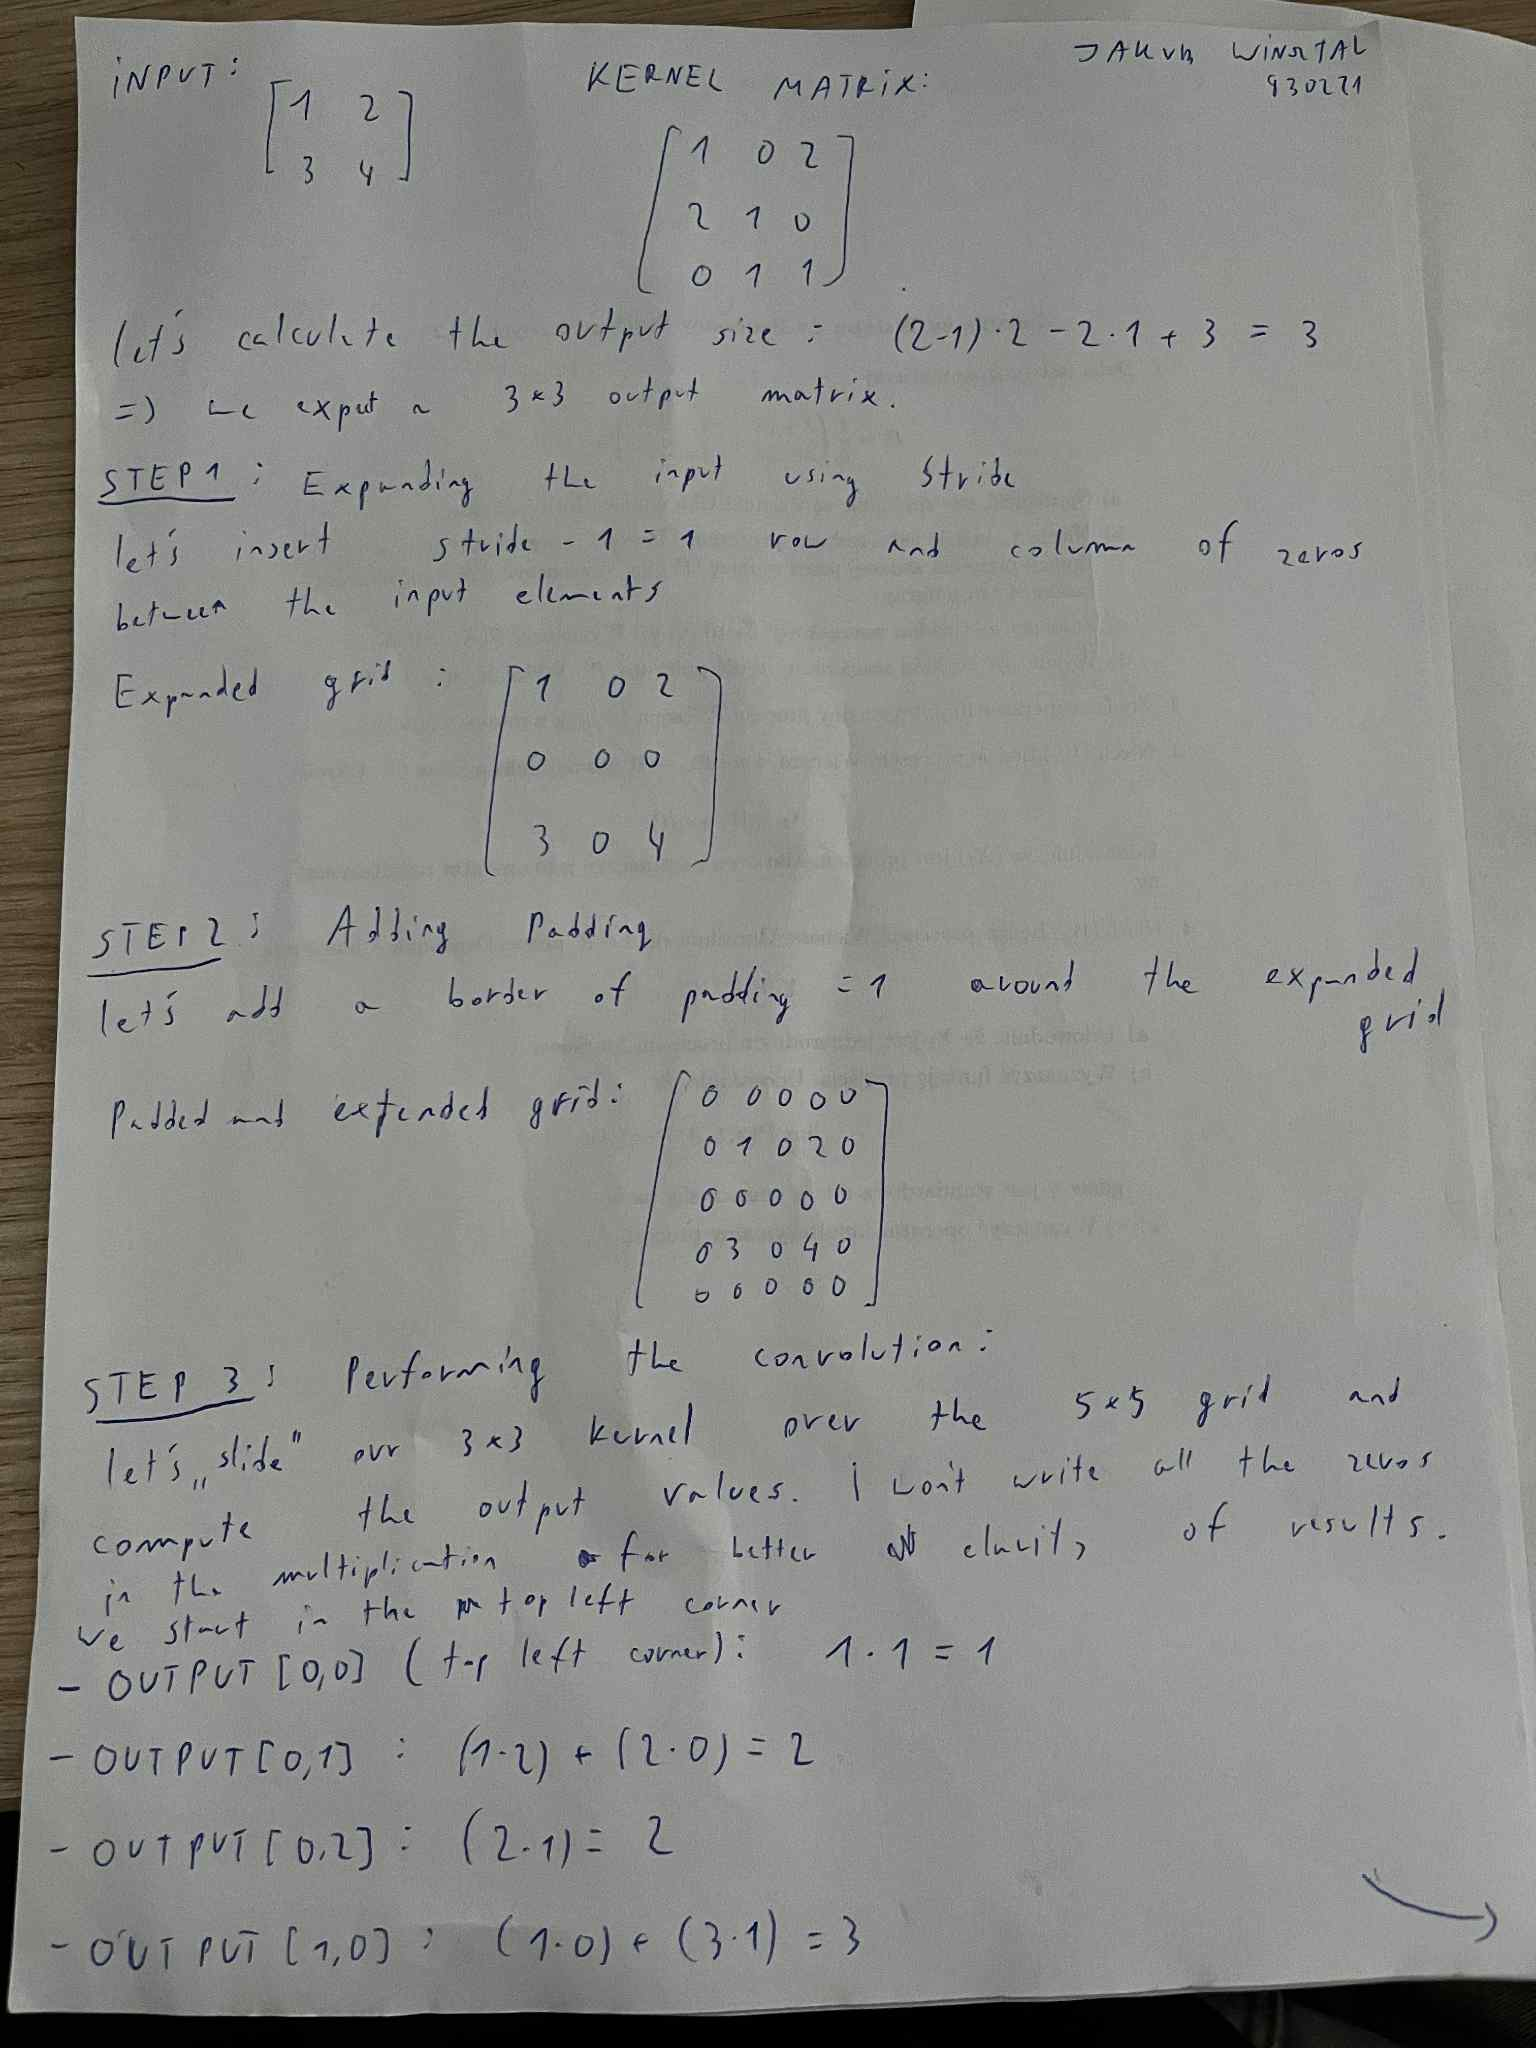


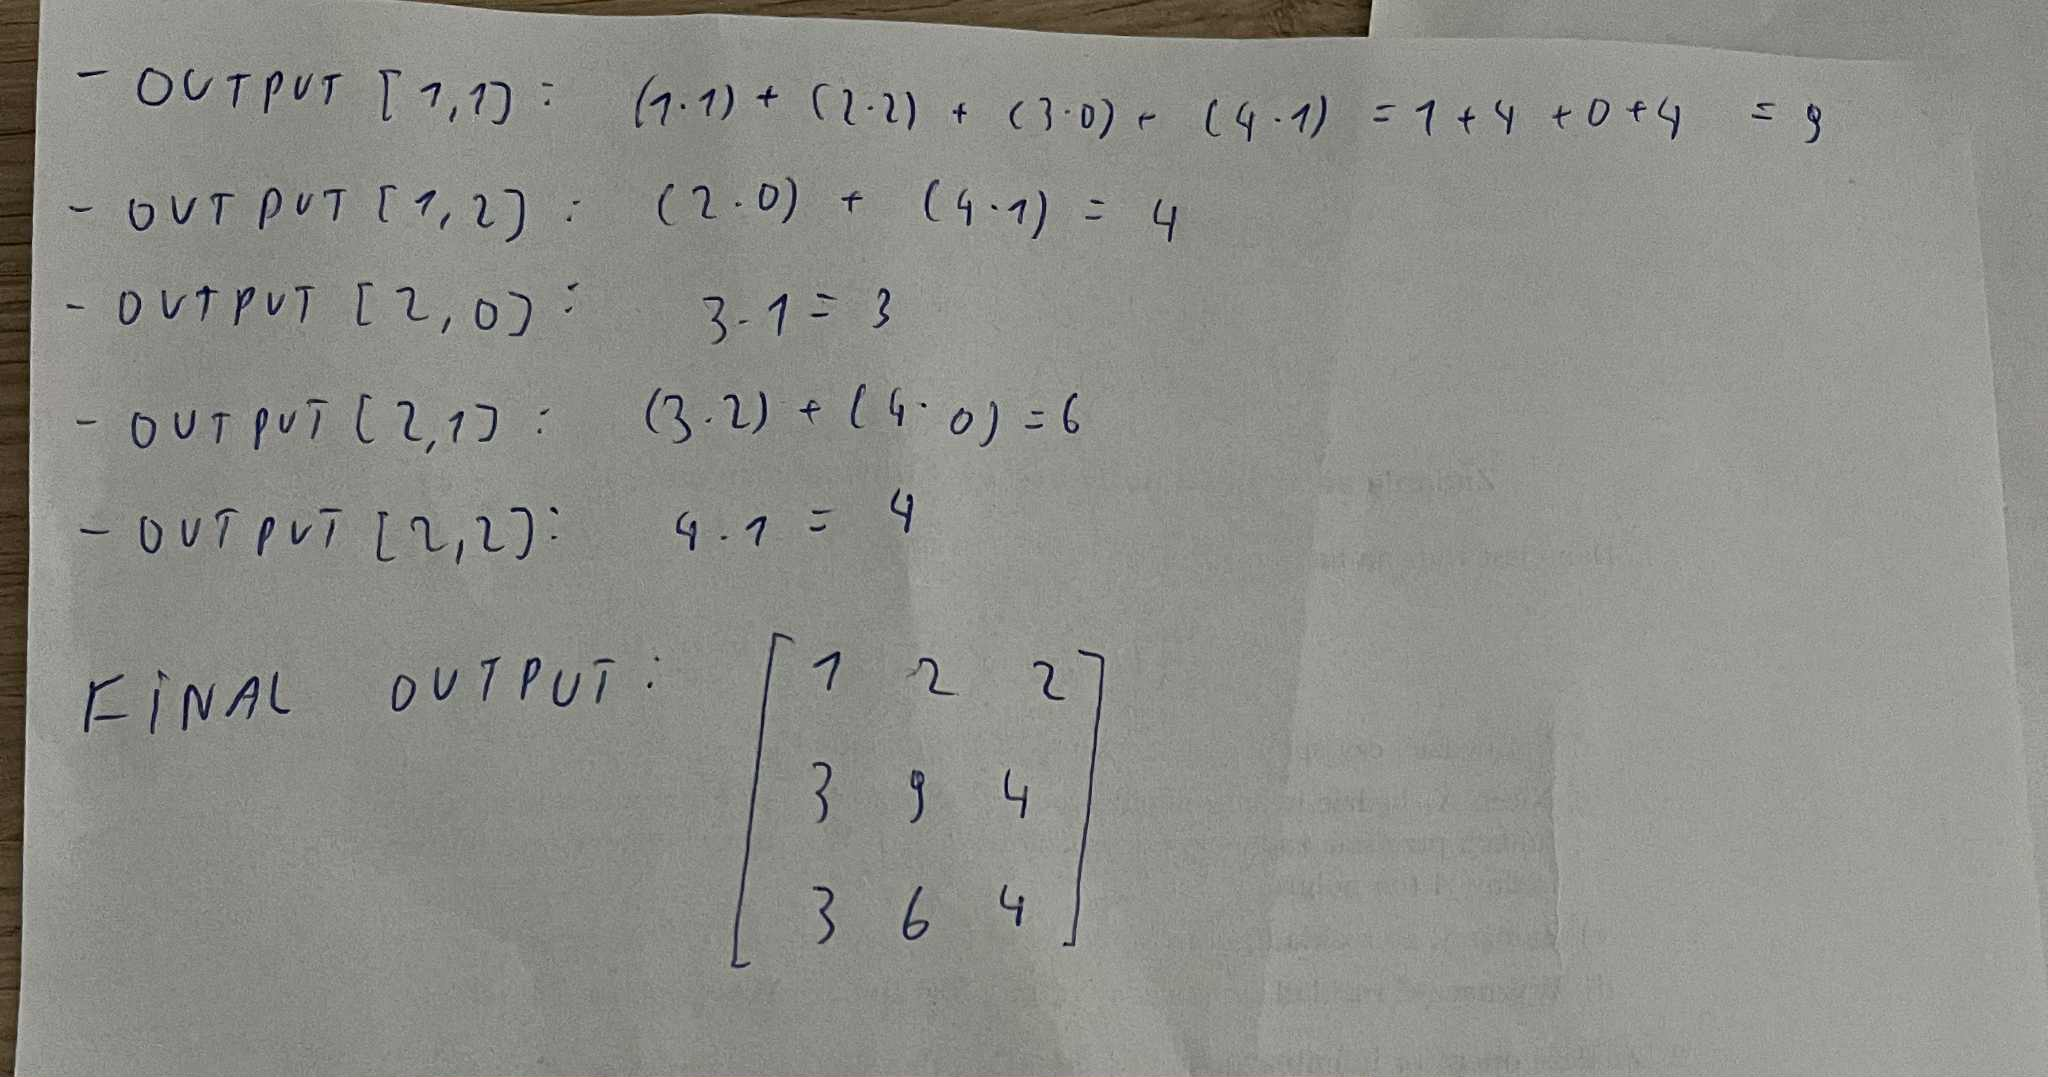